# Real-world Data Wrangling
**by HRD**

## Table of Contents
<ul>
<li><a href="#Gather Data">1) Gather Data</a></li>
<li><a href="#Assess Data">2) Assess Data</a></li>
<li><a href="#Clean Data">3) Clean Data</a></li>
<li><a href="#Update your data store">4) Update your data store</a></li>
<li><a href="#Answer the research question">5) Answer the research question</a></li>
</ul>

<a id='Gather Data'></a>
## 1. Gather data

### **1.1.** Problem Statement
In this project, timeseries data will be gathered from seven different data sources. The main purpose of the project is to showcase skills of data wrangling in terms of gathering, assessing and cleaning data. During the assessment stage I will assess the data for quality and structural issues to establish a cleaning strategy. The cleaning strategy will be implemented during the cleaning stage. Afterwards, all datasets will be combined and stored in a data store of choice. In the end, the research question will be answered by producing two timeseries plots. 

### Research question
Are there any obvious reasons of the NOK depreciation against EUR since the year 2000?

### **1.2.** Gather datasets
The seven datasets of choice are gathered from various sources. 

### Data sources
###### Daily Data
* EURNOK data: https://www.investing.com/currencies/eur-nok-historical-data
* Crude Brent Spot price (Bloomberg)

###### Monthly Data
* ECB Policy Rate data: https://data.ecb.europa.eu/main-figures/ecb-interest-rates-and-exchange-rates/key-ecb-interest-rates
* Inflation Euro Area: https://data.ecb.europa.eu/main-figures/inflation
* Inflation Norway: https://www.ssb.no/statbank/table/08981/tableViewLayout1/
* Norwegian Central Bank Key Policy Rate: https://www.norges-bank.no/tema/pengepolitikk/Styringsrenten/Styringsrenten-Oversikt-over-rentemoter-og-endringer-i-styringsrenten-/
* Daily NOK sales: https://www.norges-bank.no/en/topics/Statistics/foreign-exchange-transactions-daily/

In [2]:
# Libraries # 
import numpy as np
import pandas as pd
import requests
import zipfile
import time
import datetime as dt
import json
from csv import reader
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

# Display Options # 
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None
#pd.options.mode.chained_assignment = 'warn'

#### **Dataset 1: EURNOK**

Type: CSV 

Method: Download data by using open source Web API from Norges Bank

About: Daily data of EURNOK spot rate for the years 2000-2023

Dataset variables:

*   Variable 1: FREQ
*   Variable 2: Frekvens
*   Variable 3: BASE_CUR
*   Variable 5: QUOTE_CUR
*   Variable 7: TENOR
*   Variable 14: Innsamlingstidspunkt (Gathering date)
*   Variable 15: TIME_PERIOD
*   Variable 16: OBS_VALUE

In [714]:
url = 'https://data.norges-bank.no/api/data/EXR/B.EUR.NOK.SP?format=csv&startPeriod=2000-01-01&endPeriod=2023-11-13&locale=no&bom=include'
eurnok_r = pd.read_csv(url, sep=';')
eurnok_r.head(2)

,FREQ,Frekvens,BASE_CUR,Basisvaluta,QUOTE_CUR,Kvoteringsvaluta,TENOR,Løpetid,DECIMALS,CALCULATED,UNIT_MULT,Multiplikator,COLLECTION,Innsamlingstidspunkt,TIME_PERIOD,OBS_VALUE
0,B,Virkedag,EUR,Euro,NOK,Norske kroner,SP,Spot,4,False,0,Enheter,C,ECB concertation tidspunkt 14:15 CET,2000-01-03,"8,062"
1,B,Virkedag,EUR,Euro,NOK,Norske kroner,SP,Spot,4,False,0,Enheter,C,ECB concertation tidspunkt 14:15 CET,2000-01-04,"8,15"


#### **Dataset 2: Brent Spot Price**

Type: CSV File

Method: Download data manually from Bloomberg

About: Daily data of the Brent spot price for the years 2000-2023

Dataset variables:

*   Variable 1: Day
*   Variable 2: Date
*   Variable 3: Last px
*   Variable 4: Open Int
*   Variable 5: SMAVG(15)

In [715]:
brent_r = pd.read_csv('Data/BrentSpotPrice Development 2000-2023.csv')
brent_r.head(3)

,Day,Date,Last px,Open Int,SMAVG (15)
0,Th,11-09-23,80.37,NaN,NaN
1,We,11-08-23,79.54,NaN,NaN
2,Tu,11-07-23,81.61,453.935k,342.812k


#### **Dataset 3: European Central Bank (ECB) Policy Rate Data**
Type: CSV File

Method: Download data manually from ECB

About: ECB daily policy rate data for the years 2000-2023

Dataset variables:

*   Variable 1: DATE
*   Variable 2: TIME PERIOD
*   Variable 3: ECB Deposit Facility
*   Variable 4: ECB Marginal lending facility
*   Variable 5: ECB Main refinancing operations

In [716]:
ecbpr_r = pd.read_csv('Data/ECB Rates 2000-2023.csv')
ecbpr_r.head(2)

,DATE,TIME PERIOD,ECB Deposit facility - date of changes (raw data) - Level (FM.D.U2.EUR.4F.KR.DFR.LEV),ECB Marginal lending facility - date of changes (raw data) - Level (FM.D.U2.EUR.4F.KR.MLFR.LEV),ECB Main refinancing operations - Minimum bid rate/fixed rate (date of changes) - Level (FM.D.U2.EUR.4F.KR.MRR_RT.LEV)
0,1999-01-01,01 Jan 1999,2.0,4.5,3.0
1,1999-01-02,02 Jan 1999,2.0,4.5,3.0


#### **Dataset 4: Inflation Euro Area**
Type: CSV File

Method: Download data manually from ECB

About: ECB monthly Inflation rate data for the years 2000-2023

Dataset variables:

*   Variable 1: DATE
*   Variable 2: TIME PERIOD
*   Variable 3-x: HICP Overall Inflation Index numbers

In [717]:
ecbi_r = pd.read_csv('Data/ECB Inflation 2000-2023.csv')
ecbi_r.head(2)

,DATE,TIME PERIOD,HICP - Overall index (ICP.M.AT.N.000000.4.ANR),HICP - Overall index (ICP.M.BE.N.000000.4.ANR),HICP - Overall index (ICP.M.CY.N.000000.4.ANR),HICP - Overall index (ICP.M.DE.N.000000.4.ANR),HICP - Overall index (ICP.M.EE.N.000000.4.ANR),HICP - Overall index (ICP.M.ES.N.000000.4.ANR),HICP - Overall index (ICP.M.FI.N.000000.4.ANR),HICP - Overall index (ICP.M.FR.N.000000.4.ANR),HICP - Overall index (ICP.M.GR.N.000000.4.ANR),HICP - Overall index (ICP.M.HR.N.000000.4.ANR),HICP - Overall index (ICP.M.IE.N.000000.4.ANR),HICP - Overall index (ICP.M.IT.N.000000.4.ANR),HICP - Overall index (ICP.M.LT.N.000000.4.ANR),HICP - Overall index (ICP.M.LU.N.000000.4.ANR),HICP - Overall index (ICP.M.LV.N.000000.4.ANR),HICP - Overall index (ICP.M.MT.N.000000.4.ANR),HICP - Overall index (ICP.M.NL.N.000000.4.ANR),HICP - Overall index (ICP.M.PT.N.000000.4.ANR),HICP - Overall index (ICP.M.SI.N.000000.4.ANR),HICP - Overall index (ICP.M.SK.N.000000.4.ANR),HICP - Overall index (ICP.M.U2.N.000000.4.ANR)
0,31-01-96,1996Jan,NaN,NaN,NaN,NaN,23.4,NaN,NaN,2.0,NaN,NaN,NaN,NaN,31.5,1.0,NaN,NaN,NaN,2.5,8.4,6.4,NaN
1,29-02-96,1996Feb,NaN,NaN,NaN,NaN,24.0,NaN,NaN,2.1,NaN,NaN,NaN,NaN,29.3,0.9,NaN,NaN,NaN,2.5,8.4,6.2,NaN


#### **Dataset 5: Inflation in Norway (Consumer Price Index)**
Type: CSV File

Method: Download data from SSB with open-source API

About: Norway monthly inflation data for the years 2000-2023

Dataset variables:

*   Variable 1: consumption group
*   Variable 2: month (year-month)
*   Variable 3: contents
*   Variable 4: 03013: Consuer Price Index, by consumption group, month and contents

In [718]:
norcpi_r = pd.read_csv("https://data.ssb.no/api/v0/dataset/1086.csv?lang=en", encoding = "ISO-8859-1")
norcpi_r.head()

,consumption group,month,contents,"03013: Consumer Price Index, by consumption group, month and contents"
0,TOTAL All-item index,1979M01,Consumer Price Index (2015=100),25.3
1,TOTAL All-item index,1979M01,Monthly change (per cent),0.0
2,TOTAL All-item index,1979M01,12-month rate (per cent),5.9
3,TOTAL All-item index,1979M02,Consumer Price Index (2015=100),25.4
4,TOTAL All-item index,1979M02,Monthly change (per cent),0.4


#### **Dataset 6: Norwegian Central Bank Key Policy Rate Data**
Type: CSV 

Method: Download data from Norges Bank with REST API

About: Norway key policy rate data for the years 2000-2023

Dataset variables:

*   Variable 1: FREQ
* ...
* Variable 13: TIME_PERIOD
* Variable 14: OBS_VALUE

In [719]:
url = 'https://data.norges-bank.no/api/data/IR/B.KPRA.SD.R?format=csv&startPeriod=2000-01-01&endPeriod=2023-11-13&locale=no&bom=include'
nbpr_r = pd.read_csv(url, sep=';')
nbpr_r.tail()

,FREQ,Frekvens,INSTRUMENT_TYPE,Instrumenttype,TENOR,Løpetid,UNIT_MEASURE,Måleenhet,DECIMALS,COLLECTION,Innsamlingstidspunkt,TIME_PERIOD,OBS_VALUE,CALC_METHOD,Calculation Method
5999,B,Virkedag,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,E,Slutten av dagen,2023-11-07,"4,25",NaN,NaN
6000,B,Virkedag,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,E,Slutten av dagen,2023-11-08,"4,25",NaN,NaN
6001,B,Virkedag,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,E,Slutten av dagen,2023-11-09,"4,25",NaN,NaN
6002,B,Virkedag,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,E,Slutten av dagen,2023-11-10,"4,25",NaN,NaN
6003,B,Virkedag,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,E,Slutten av dagen,2023-11-13,"4,25",NaN,NaN


#### **Dataset 7: Daily NOK Sales by the Norwegian Central Bank**
Type: Web-scraping 

Method: Download data from Norges Bank by web-scraping

About: Monthly NOK sales by Norges bank for the years 2000-2023 (sales daily on fixed amount)

Dataset variables:

*   Variable 1: FREQ
* ...
* Variable 13: TIME_PERIOD
* Variable 14: OBS_VALUE

In [207]:
url = 'https://www.norges-bank.no/en/topics/Statistics/foreign-exchange-transactions-daily/'
response = requests.get(url)
with open('NOK_Sales.html', 'wb') as file:
    file.write(response.content)

soup = BeautifulSoup(response.content, 'html.parser')
result = soup.prettify().splitlines()
print('\n'.join(result[250:310]))

          <caption>
           Foreign exchange transactions - In millions of NOK
          </caption>
          <thead>
           <tr>
            <th align="center" scope="col">
            </th>
            <th align="center" scope="col">
             Jan
            </th>
            <th align="center" scope="col">
             Feb
            </th>
            <th align="center" scope="col">
             Mar
            </th>
            <th align="center" scope="col">
             Apr
            </th>
            <th align="center" scope="col">
             May
            </th>
            <th align="center" scope="col">
             Jun
            </th>
            <th align="center" scope="col">
             Jul
            </th>
            <th align="center" scope="col">
             Aug
            </th>
            <th align="center" scope="col">
             Sep
            </th>
            <th align="center" scope="col">
             Oct
            </th>
           

In [721]:
# Parse table elements from the web scraped output # 
table = soup.find('table')
data = []
for row in table.find_all('tr'):
   cols = row.find_all('td')
   if len(cols) == 0:
       cols = row.find_all('th')
   cols = [i.text.strip() for i in cols]
   data.append([i for i in cols if i])  # Get rid of empty values
print(data)

[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ['1500', '1900', '1700', '1500', '1400', '1300', '1000', '1000', '1100', '1200', '1400'], ['-250', '0', '0', '2000', '2000', '1500', '1500', '1500', '3500', '4300', '3700', '1900'], ['-800', '-1700', '-1700', '-1800', '-1800', '-1700', '-1700', '-1700', '-1700', '-1700', '-700 *\n                \nSe annotasjon', '0'], ['-500', '-500', '-500 *\n                \nSe annotasjon', '-2000', '-2100', '-2300', '-2500', '-2000', '-2000', '-1600', '-1600 *\n                \nSe annotasjon', '-500'], ['-350', '-450', '-600', '-600', '-600', '-600', '-600', '-500', '-700', '-700', '-700', '-700'], ['-900', '-900', '-800', '-800', '-800', '-750', '-600', '-600', '-450', '-450', '-350', '-350'], ['-1000', '-1000', '-850', '-850', '-850', '-850', '-850', '-850', '-650', '-650', '-650', '-900'], ['-500', '-900', '-900', '-900', '-900', '-900', '-900', '-900', '-900', '-900', '-900', '-900'], ['-500', '-700', '-700

In [722]:
# Let's convert the messy data to a pandas dataframe # 
headers = data.pop(0)
noksales_r = pd.DataFrame(data, columns=headers)
years = range(2023, 1999, -1)
noksales_r.index = years

In [723]:
noksales_r.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,1500,1900,1700,1500,1400,1300,1000,1000,1100,1200,1400,None
2022,-250,0,0,2000,2000,1500,1500,1500,3500,4300,3700,1900
2021,-800,-1700,-1700,-1800,-1800,-1700,-1700,-1700,-1700,-1700,-700 *\n \nSe annotasjon,0
2020,-500,-500,-500 *\n \nSe annotasjon,-2000,-2100,-2300,-2500,-2000,-2000,-1600,-1600 *\n \nSe annotasjon,-500
2019,-350,-450,-600,-600,-600,-600,-600,-500,-700,-700,-700,-700


In [724]:
# Saving our data to csv # 
eurnok_r.to_csv('Data/eurnok.csv')
brent_r.to_csv('Data/brent.csv')
ecbpr_r.to_csv('Data/ecbpr.csv')
ecbi_r.to_csv('Data/ecbi.csv')
norcpi_r.to_csv('Data/norcpi.csv')
nbpr_r.to_csv('Data/nbpr.csv')
noksales_r.to_csv('Data/noksales.csv')

In [3]:
# loading our gathered data into the environment # 
eurnok_r = pd.read_csv('Data/eurnok.csv')
brent_r = pd.read_csv('Data/brent.csv')
ecbpr_r = pd.read_csv('Data/ecbpr.csv')
ecbi_r = pd.read_csv('Data/ecbi.csv')
norcpi_r = pd.read_csv('Data/norcpi.csv')
nbpr_r = pd.read_csv('Data/nbpr.csv')
noksales_r = pd.read_csv('Data/noksales.csv')

**Summary gathering stage**: We have gathered 7 different data sets related to Norway/Euro area and the FX spot rate. The _r denotes that the data is raw and not manipulated. Variable names are as follows: 
* eurnok: eurnok spot rate (Gathered by: API)
* brent: brent spot price (Gathered by: download CSV)
* ecbpr: ECB Policy Rate data (Gathered by: download CSV)
* ecbi: Inflation Euro Area (Gathered by: download CSV)
* norcpi: Norway Inflation data (Gathered by: API)
* nbpr: Norwegian central bank policy rate (Gathered by: API)
* noksales: Daily NOK sales by the Norwegian Central Bank (Gathered by: Web Scraping)

<a id='Assess Data'></a>
## 2. Assess data

In this stage we will assess our data for aspects of quality and tidiness. For our final combined dataset we are looking to extract one column from each dataframe, and a common datetime collumn. The values of interest in our final dataframe must pass the key dimensions of data quality:
* Completeness
* Validity
* Accuracy 
* Consistency
* Uniqueness

The final dataframe must also pass the aspects of tidy data: 
* Each column is a variable
* Each row is an observation
* Each type of observational unit forms a table

We will start by inspecting our dataframe visually, as it will enable us to get an overview of what we are working with. Obvious issues can then be spotted in an early phase. After the initial visual inspection, we will perform programmatic assessments to provide us a more granular understanding of our data. 

### Quality Issue 1: Inconsistent formatting of date and values

In [726]:
eurnok_r.head(2)

,Unnamed: 0,FREQ,Frekvens,BASE_CUR,Basisvaluta,QUOTE_CUR,Kvoteringsvaluta,TENOR,Løpetid,DECIMALS,CALCULATED,UNIT_MULT,Multiplikator,COLLECTION,Innsamlingstidspunkt,TIME_PERIOD,OBS_VALUE
0,0,B,Virkedag,EUR,Euro,NOK,Norske kroner,SP,Spot,4,False,0,Enheter,C,ECB concertation tidspunkt 14:15 CET,2000-01-03,"8,062"
1,1,B,Virkedag,EUR,Euro,NOK,Norske kroner,SP,Spot,4,False,0,Enheter,C,ECB concertation tidspunkt 14:15 CET,2000-01-04,"8,15"


In [727]:
brent_r.head(2)

,Unnamed: 0,Day,Date,Last px,Open Int,SMAVG (15)
0,0,Th,11-09-23,80.37,NaN,NaN
1,1,We,11-08-23,79.54,NaN,NaN


In [728]:
ecbpr_r.head(2)

,Unnamed: 0,DATE,TIME PERIOD,ECB Deposit facility - date of changes (raw data) - Level (FM.D.U2.EUR.4F.KR.DFR.LEV),ECB Marginal lending facility - date of changes (raw data) - Level (FM.D.U2.EUR.4F.KR.MLFR.LEV),ECB Main refinancing operations - Minimum bid rate/fixed rate (date of changes) - Level (FM.D.U2.EUR.4F.KR.MRR_RT.LEV)
0,0,1999-01-01,01 Jan 1999,2.0,4.5,3.0
1,1,1999-01-02,02 Jan 1999,2.0,4.5,3.0


In [730]:
ecbi_r.tail(2)

,Unnamed: 0,DATE,TIME PERIOD,HICP - Overall index (ICP.M.AT.N.000000.4.ANR),HICP - Overall index (ICP.M.BE.N.000000.4.ANR),HICP - Overall index (ICP.M.CY.N.000000.4.ANR),HICP - Overall index (ICP.M.DE.N.000000.4.ANR),HICP - Overall index (ICP.M.EE.N.000000.4.ANR),HICP - Overall index (ICP.M.ES.N.000000.4.ANR),HICP - Overall index (ICP.M.FI.N.000000.4.ANR),HICP - Overall index (ICP.M.FR.N.000000.4.ANR),HICP - Overall index (ICP.M.GR.N.000000.4.ANR),HICP - Overall index (ICP.M.HR.N.000000.4.ANR),HICP - Overall index (ICP.M.IE.N.000000.4.ANR),HICP - Overall index (ICP.M.IT.N.000000.4.ANR),HICP - Overall index (ICP.M.LT.N.000000.4.ANR),HICP - Overall index (ICP.M.LU.N.000000.4.ANR),HICP - Overall index (ICP.M.LV.N.000000.4.ANR),HICP - Overall index (ICP.M.MT.N.000000.4.ANR),HICP - Overall index (ICP.M.NL.N.000000.4.ANR),HICP - Overall index (ICP.M.PT.N.000000.4.ANR),HICP - Overall index (ICP.M.SI.N.000000.4.ANR),HICP - Overall index (ICP.M.SK.N.000000.4.ANR),HICP - Overall index (ICP.M.U2.N.000000.4.ANR)
332,332,30-09-23,2023Sep,5.7,0.7,4.3,4.3,3.9,3.3,3.0,5.7,2.4,7.4,5.0,5.6,4.1,3.4,3.6,4.9,-0.3,4.8,7.1,9.0,4.3
333,333,31-10-23,2023Oct,4.9,-1.7,3.3,3.0,5.0,3.5,2.4,4.5,3.9,6.7,3.6,1.9,3.0,2.1,2.4,4.3,-1.0,3.3,6.6,7.8,2.9


In [731]:
ecbi_r.head(2)

,Unnamed: 0,DATE,TIME PERIOD,HICP - Overall index (ICP.M.AT.N.000000.4.ANR),HICP - Overall index (ICP.M.BE.N.000000.4.ANR),HICP - Overall index (ICP.M.CY.N.000000.4.ANR),HICP - Overall index (ICP.M.DE.N.000000.4.ANR),HICP - Overall index (ICP.M.EE.N.000000.4.ANR),HICP - Overall index (ICP.M.ES.N.000000.4.ANR),HICP - Overall index (ICP.M.FI.N.000000.4.ANR),HICP - Overall index (ICP.M.FR.N.000000.4.ANR),HICP - Overall index (ICP.M.GR.N.000000.4.ANR),HICP - Overall index (ICP.M.HR.N.000000.4.ANR),HICP - Overall index (ICP.M.IE.N.000000.4.ANR),HICP - Overall index (ICP.M.IT.N.000000.4.ANR),HICP - Overall index (ICP.M.LT.N.000000.4.ANR),HICP - Overall index (ICP.M.LU.N.000000.4.ANR),HICP - Overall index (ICP.M.LV.N.000000.4.ANR),HICP - Overall index (ICP.M.MT.N.000000.4.ANR),HICP - Overall index (ICP.M.NL.N.000000.4.ANR),HICP - Overall index (ICP.M.PT.N.000000.4.ANR),HICP - Overall index (ICP.M.SI.N.000000.4.ANR),HICP - Overall index (ICP.M.SK.N.000000.4.ANR),HICP - Overall index (ICP.M.U2.N.000000.4.ANR)
0,0,31-01-96,1996Jan,NaN,NaN,NaN,NaN,23.4,NaN,NaN,2.0,NaN,NaN,NaN,NaN,31.5,1.0,NaN,NaN,NaN,2.5,8.4,6.4,NaN
1,1,29-02-96,1996Feb,NaN,NaN,NaN,NaN,24.0,NaN,NaN,2.1,NaN,NaN,NaN,NaN,29.3,0.9,NaN,NaN,NaN,2.5,8.4,6.2,NaN


In [732]:
norcpi_r.head(2)

,Unnamed: 0,consumption group,month,contents,"03013: Consumer Price Index, by consumption group, month and contents"
0,0,TOTAL All-item index,1979M01,Consumer Price Index (2015=100),25.3
1,1,TOTAL All-item index,1979M01,Monthly change (per cent),0.0


In [733]:
nbpr_r.head(2)

,Unnamed: 0,FREQ,Frekvens,INSTRUMENT_TYPE,Instrumenttype,TENOR,Løpetid,UNIT_MEASURE,Måleenhet,DECIMALS,COLLECTION,Innsamlingstidspunkt,TIME_PERIOD,OBS_VALUE,CALC_METHOD,Calculation Method
0,0,B,Virkedag,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,E,Slutten av dagen,2000-01-03,"5,5",NaN,NaN
1,1,B,Virkedag,KPRA,Styringsrenten,SD,Foliorenten,R,Rente,2,E,Slutten av dagen,2000-01-04,"5,5",NaN,NaN


In [748]:
noksales_r.head(2)

,Unnamed: 0,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2023,1500,1900,1700,1500,1400,1300,1000,1000,1100,1200,1400,NaN
1,2022,-250,0,0,2000,2000,1500,1500,1500,3500,4300,3700,1900.0


**Takeaway 1, visual assessment**: Date format differs across the datasets. 
* yyyy-mm-dd: eurnok, ecbpr and nbpr
* mm-dd-yy: brent
* dd-mm-yy: ecbi
* yyyymn: norcpi
* matrix: noksales

1) Headers are of inconsistent format with caps lock or lower case. Lets convert the values to a common format. 
2) Headers have various names. Let's rename the relevant columns to a common format. 

In [749]:
eurnok_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            6012 non-null   int64 
 1   FREQ                  6012 non-null   object
 2   Frekvens              6012 non-null   object
 3   BASE_CUR              6012 non-null   object
 4   Basisvaluta           6012 non-null   object
 5   QUOTE_CUR             6012 non-null   object
 6   Kvoteringsvaluta      6012 non-null   object
 7   TENOR                 6012 non-null   object
 8   Løpetid               6012 non-null   object
 9   DECIMALS              6012 non-null   int64 
 10  CALCULATED            6012 non-null   bool  
 11  UNIT_MULT             6012 non-null   int64 
 12  Multiplikator         6012 non-null   object
 13  COLLECTION            6012 non-null   object
 14  Innsamlingstidspunkt  6012 non-null   object
 15  TIME_PERIOD           6012 non-null   

In [750]:
brent_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7392 entries, 0 to 7391
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7392 non-null   int64  
 1   Day         6144 non-null   object 
 2   Date        6144 non-null   object 
 3   Last px     6142 non-null   float64
 4   Open Int    6135 non-null   object 
 5   SMAVG (15)  6121 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 346.6+ KB


In [751]:
ecbpr_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9078 entries, 0 to 9077
Data columns (total 6 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                  --------------  -----  
 0   Unnamed: 0                                                                                                              9078 non-null   int64  
 1   DATE                                                                                                                    9078 non-null   object 
 2   TIME PERIOD                                                                                                             9078 non-null   object 
 3   ECB Deposit facility - date of changes (raw data) - Level (FM.D.U2.EUR.4F.KR.DFR.LEV)                                   9078 non-null   float64


In [752]:
ecbi_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      334 non-null    int64  
 1   DATE                                            334 non-null    object 
 2   TIME PERIOD                                     334 non-null    object 
 3   HICP - Overall index (ICP.M.AT.N.000000.4.ANR)  322 non-null    float64
 4   HICP - Overall index (ICP.M.BE.N.000000.4.ANR)  322 non-null    float64
 5   HICP - Overall index (ICP.M.CY.N.000000.4.ANR)  322 non-null    float64
 6   HICP - Overall index (ICP.M.DE.N.000000.4.ANR)  322 non-null    float64
 7   HICP - Overall index (ICP.M.EE.N.000000.4.ANR)  334 non-null    float64
 8   HICP - Overall index (ICP.M.ES.N.000000.4.ANR)  322 non-null    float64
 9   HICP - Overall index (ICP.M.FI.N.000000.4.A

In [753]:
norcpi_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 5 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Unnamed: 0                                                             1614 non-null   int64  
 1   consumption group                                                      1614 non-null   object 
 2   month                                                                  1614 non-null   object 
 3   contents                                                               1614 non-null   object 
 4   03013: Consumer Price Index, by consumption group, month and contents  1614 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 63.2+ KB


In [754]:
nbpr_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6004 entries, 0 to 6003
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6004 non-null   int64  
 1   FREQ                  6004 non-null   object 
 2   Frekvens              6004 non-null   object 
 3   INSTRUMENT_TYPE       6004 non-null   object 
 4   Instrumenttype        6004 non-null   object 
 5   TENOR                 6004 non-null   object 
 6   Løpetid               6004 non-null   object 
 7   UNIT_MEASURE          6004 non-null   object 
 8   Måleenhet             6004 non-null   object 
 9   DECIMALS              6004 non-null   int64  
 10  COLLECTION            6004 non-null   object 
 11  Innsamlingstidspunkt  6004 non-null   object 
 12  TIME_PERIOD           6004 non-null   object 
 13  OBS_VALUE             6004 non-null   object 
 14  CALC_METHOD           0 non-null      float64
 15  Calculation Method   

In [755]:
noksales_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24 non-null     int64  
 1   Jan         24 non-null     int64  
 2   Feb         24 non-null     int64  
 3   Mar         24 non-null     object 
 4   Apr         24 non-null     int64  
 5   May         24 non-null     object 
 6   Jun         24 non-null     int64  
 7   Jul         24 non-null     int64  
 8   Aug         24 non-null     int64  
 9   Sep         24 non-null     int64  
 10  Oct         24 non-null     object 
 11  Nov         24 non-null     object 
 12  Dec         23 non-null     float64
dtypes: float64(1), int64(8), object(4)
memory usage: 2.6+ KB


**Takeaway 2, programmatic assessment**: 
* eurnok: timeperiod is object, obs_value is string
* brent: date is object
* ecbpr: date is object, dataframe looks messy
* ecbi: date is object
* norcpi: month is actually yearmonth, and is also an object
* nbpr: time period is object, obs_value is object
* noksales: Setup is messy, some values are ints, other are floats. 

**Action notes**: 
* Strip, lowercase and replace spaces with underscores for every column. 
* Rename all date columns to date.
* Convert all datetime objects to date. 
* Convert all relevant value-columns to float except noksales which will be int. 
* Convert headers to a common format.

### Quality Issue 2: Data interval and consistency

In [756]:
eurnok_r[['TIME_PERIOD', 'OBS_VALUE']].tail(n=8)

,TIME_PERIOD,OBS_VALUE
6004,2023-11-02,"11,8743"
6005,2023-11-03,"11,8535"
6006,2023-11-06,"11,8235"
6007,2023-11-07,"11,922"
6008,2023-11-08,"11,9305"
6009,2023-11-09,"11,9335"
6010,2023-11-10,"11,8725"
6011,2023-11-13,"11,877"


In [757]:
brent_r[['Day', 'Date']].head(n=8)

,Day,Date
0,Th,11-09-23
1,We,11-08-23
2,Tu,11-07-23
3,Mo,11-06-23
4,NaN,NaN
5,Fr,11-03-23
6,Th,11-02-23
7,We,11-01-23


In [744]:
nbpr_r[['TIME_PERIOD','OBS_VALUE']].iloc[5965:5969, :]

,TIME_PERIOD,OBS_VALUE
5965,2023-09-20,4
5966,2023-09-21,4
5967,2023-09-22,"4,25"
5968,2023-09-25,"4,25"


In [758]:
ecbpr_r.iloc[8935:8939,:]

,Unnamed: 0,DATE,TIME PERIOD,ECB Deposit facility - date of changes (raw data) - Level (FM.D.U2.EUR.4F.KR.DFR.LEV),ECB Marginal lending facility - date of changes (raw data) - Level (FM.D.U2.EUR.4F.KR.MLFR.LEV),ECB Main refinancing operations - Minimum bid rate/fixed rate (date of changes) - Level (FM.D.U2.EUR.4F.KR.MRR_RT.LEV)
8935,8935,2023-06-19,19 Jun 2023,3.25,4.00,3.75
8936,8936,2023-06-20,20 Jun 2023,3.25,4.00,3.75
8937,8937,2023-06-21,21 Jun 2023,3.50,4.25,4.00
8938,8938,2023-06-22,22 Jun 2023,3.50,4.25,4.00


**Takeaway**: eurnok and brent are the only two dataframes with real daily data (data differs for every single day), but the data is only available during weekdays. The other dataframes have data on a monthly basis (some is daily data, but with replicate values). Noksales is daily data, but is fixed for the whole month. ecbpr and nbpr (central bank rate data) is also daily data, but is very rarely changed (often at least a month inbetween each change). Next, from what we see above, the change in the nbpr value happened at 09-21 and the ecbpr change at 06-21. Thus, the change can happen at any day of the month (changes happen during central bank meeting decisions). 

The reason this is an issue is because we want to combine our dataframes. To do that we need date to be a common column in a common format. To merge our dataframes, we are considering two options:  
1) Aggregate daily data up to monthly level (e.g. mean) and join on yearmonth. For ecbr and nbpr we would need to consider how we handle mid-month changes in rates.
2) Left join our data on the daily level, and be left with NaNs for monthly data. Then replicate values for data on a monthly level down to a daily level (or a preferred imputation method). For daily nok sales we would require that on a weekday level (NaNs for weekends). 

Which option we choose depends on our data requirements. Research questions about daily movements would require daily data, "E.g. what happened at date x and why". For this project, our research question revolves around inspecting the overall change in values over time. Therefore, data on a monthly basis is sufficient for our purpose.  

**Action Notes**: We will aggregate daily data up to a monthly level by taking the mean of variables. For ecbpr and nbpr every change is in the interval of 0.25, hence whether we move value-changes to the next month or take the mean would either way not matter as both choices are neither entirely correct or incorrect. But in the purpose of our research question where we are looking to inspect overall changes over time, either choice will be sufficient for our purpose. 

### Quality Issue 3: Completeness and Uniqueness

In [759]:
dflist = [eurnok_r, brent_r, ecbpr_r, ecbi_r, norcpi_r, nbpr_r]
dfliststr = ['eurnok_r', 'brent_r', 'ecbpr_r', 'ecbi_r', 'norcpi_r', 'nbpr_r']
for data,name in zip(dflist, dfliststr): 
    print(name, data.duplicated().sum()) 

eurnok_r 0
brent_r 0
ecbpr_r 0
ecbi_r 0
norcpi_r 0
nbpr_r 0


**Takeaway 1**: No duplicates are present in our dataframes. 

In [760]:
for name,data in zip(dfliststr, dflist): 
    print(f'Dataframe name: {name}','\n', data.isna().sum().sum(), '\n')

Dataframe name: eurnok_r 
 0 

Dataframe name: brent_r 
 6274 

Dataframe name: ecbpr_r 
 0 

Dataframe name: ecbi_r 
 192 

Dataframe name: norcpi_r 
 0 

Dataframe name: nbpr_r 
 12008 



Some of our dataframes have NAs, but it might not be an issue. Let's take a closer look at brent, ecbi, and nbpr. 

In [761]:
brent_r.shape

(7392, 6)

In [762]:
brent_r.tail(n=10)

,Unnamed: 0,Day,Date,Last px,Open Int,SMAVG (15)
7382,7382,NaN,NaN,NaN,NaN,NaN
7383,7383,Fr,12/17/1999,25.52,68617,NaN
7384,7384,Th,12/16/1999,26.09,20753,NaN
7385,7385,We,12/15/1999,25.43,17293,NaN
7386,7386,Tu,12/14/1999,25.02,27979,NaN
7387,7387,Mo,12/13/1999,24.58,36380,NaN
7388,7388,NaN,NaN,NaN,NaN,NaN
7389,7389,Fr,12-10-99,24.46,38094,NaN
7390,7390,Th,12-09-99,25.05,39170,NaN
7391,7391,We,12-08-99,25.69,41388,NaN


We have 7392 rows for brent, and 1/6 of the rows are NAs because brent is only quoted in the weekends, and each week is followed by an NaN likely as a result of the data gathering. Hence, the NaNs are not an issue.

In [763]:
len(brent_r)*(1/6)

1232.0

In [764]:
brent_r['Last px'].isna().sum()

1250

**Takeaway brent**: The NaNs diff between 1232 and 1250 are neglishible, as we will look to aggregate our data to a monthly level. Let's look at ecbi next. 

In [766]:
ecbi_r.head(2)

,Unnamed: 0,DATE,TIME PERIOD,HICP - Overall index (ICP.M.AT.N.000000.4.ANR),HICP - Overall index (ICP.M.BE.N.000000.4.ANR),HICP - Overall index (ICP.M.CY.N.000000.4.ANR),HICP - Overall index (ICP.M.DE.N.000000.4.ANR),HICP - Overall index (ICP.M.EE.N.000000.4.ANR),HICP - Overall index (ICP.M.ES.N.000000.4.ANR),HICP - Overall index (ICP.M.FI.N.000000.4.ANR),HICP - Overall index (ICP.M.FR.N.000000.4.ANR),HICP - Overall index (ICP.M.GR.N.000000.4.ANR),HICP - Overall index (ICP.M.HR.N.000000.4.ANR),HICP - Overall index (ICP.M.IE.N.000000.4.ANR),HICP - Overall index (ICP.M.IT.N.000000.4.ANR),HICP - Overall index (ICP.M.LT.N.000000.4.ANR),HICP - Overall index (ICP.M.LU.N.000000.4.ANR),HICP - Overall index (ICP.M.LV.N.000000.4.ANR),HICP - Overall index (ICP.M.MT.N.000000.4.ANR),HICP - Overall index (ICP.M.NL.N.000000.4.ANR),HICP - Overall index (ICP.M.PT.N.000000.4.ANR),HICP - Overall index (ICP.M.SI.N.000000.4.ANR),HICP - Overall index (ICP.M.SK.N.000000.4.ANR),HICP - Overall index (ICP.M.U2.N.000000.4.ANR)
0,0,31-01-96,1996Jan,NaN,NaN,NaN,NaN,23.4,NaN,NaN,2.0,NaN,NaN,NaN,NaN,31.5,1.0,NaN,NaN,NaN,2.5,8.4,6.4,NaN
1,1,29-02-96,1996Feb,NaN,NaN,NaN,NaN,24.0,NaN,NaN,2.1,NaN,NaN,NaN,NaN,29.3,0.9,NaN,NaN,NaN,2.5,8.4,6.2,NaN


In [767]:
ecbi_r.isna().sum().sum()

192

In [768]:
ecbi_r.shape

(334, 24)

In [769]:
ecbi_r.iloc[0:47,:].tail()

,Unnamed: 0,DATE,TIME PERIOD,HICP - Overall index (ICP.M.AT.N.000000.4.ANR),HICP - Overall index (ICP.M.BE.N.000000.4.ANR),HICP - Overall index (ICP.M.CY.N.000000.4.ANR),HICP - Overall index (ICP.M.DE.N.000000.4.ANR),HICP - Overall index (ICP.M.EE.N.000000.4.ANR),HICP - Overall index (ICP.M.ES.N.000000.4.ANR),HICP - Overall index (ICP.M.FI.N.000000.4.ANR),HICP - Overall index (ICP.M.FR.N.000000.4.ANR),HICP - Overall index (ICP.M.GR.N.000000.4.ANR),HICP - Overall index (ICP.M.HR.N.000000.4.ANR),HICP - Overall index (ICP.M.IE.N.000000.4.ANR),HICP - Overall index (ICP.M.IT.N.000000.4.ANR),HICP - Overall index (ICP.M.LT.N.000000.4.ANR),HICP - Overall index (ICP.M.LU.N.000000.4.ANR),HICP - Overall index (ICP.M.LV.N.000000.4.ANR),HICP - Overall index (ICP.M.MT.N.000000.4.ANR),HICP - Overall index (ICP.M.NL.N.000000.4.ANR),HICP - Overall index (ICP.M.PT.N.000000.4.ANR),HICP - Overall index (ICP.M.SI.N.000000.4.ANR),HICP - Overall index (ICP.M.SK.N.000000.4.ANR),HICP - Overall index (ICP.M.U2.N.000000.4.ANR)
42,42,31-07-99,1999Jul,0.3,0.7,1.3,0.5,2.4,2.1,1.4,0.4,1.6,4.2,2.0,1.7,0.8,-0.3,1.6,1.7,1.8,1.9,6.0,13.6,1.0
43,43,31-08-99,1999Aug,0.5,0.9,-0.5,0.6,2.3,2.3,1.3,0.5,1.4,4.1,2.5,1.5,1.0,1.4,1.8,1.9,2.5,1.8,6.7,14.4,1.1
44,44,30-09-99,1999Sep,0.6,1.3,0.2,0.8,2.5,2.5,1.4,0.6,1.3,3.9,2.6,1.8,1.9,1.6,2.1,1.9,2.0,1.9,7.4,14.6,1.2
45,45,31-10-99,1999Oct,0.8,1.4,1.7,0.9,2.6,2.4,1.6,0.8,1.7,4.0,2.8,2.0,0.3,1.9,2.6,2.0,1.8,1.8,7.6,13.9,1.3
46,46,30-11-99,1999Nov,1.0,1.6,2.6,1.0,3.0,2.7,1.9,0.9,2.0,3.1,2.9,2.0,0.2,1.8,3.0,3.8,2.0,1.9,7.8,13.8,1.5


In [771]:
ecbi_r.iloc[0:47,:].isna().sum().sum()

192

**Takeaway ecbi**: All NaNs are related to date less than year 2000, which means the NaNs are neglishible as we are only interested in data from year 2000 and onwards. Let's look at nbpr next.  

In [772]:
nbpr_r.isna().sum().sort_values(ascending=False).head(3)

CALC_METHOD           6004
Calculation Method    6004
Unnamed: 0               0
dtype: int64

**Takeaway nbpr**: All NaNs are related to columns not in our interest and can be disregarded. 

**Overall Takeaway**: The dataframes do not contain any completeness or uniqueness issues, hence we do not have to include this part in our cleaning process. This part of the assessment stage is kept as reference even though there are no cleaning actions from it.  

### Quality Issue 4: Noksales Consistency

In [4]:
noksales_r.head()

,Unnamed: 0,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2023,1500,1900,1700,1500,1400,1300,1000,1000,1100,1200,1400,NaN
1,2022,-250,0,0,2000,2000,1500,1500,1500,3500,4300,3700,1900.0
2,2021,-800,-1700,-1700,-1800,-1800,-1700,-1700,-1700,-1700,-1700,-700 *\n \nSe annotasjon,0.0
3,2020,-500,-500,-500 *\n \nSe annotasjon,-2000,-2100,-2300,-2500,-2000,-2000,-1600,-1600 *\n \nSe annotasjon,-500.0
4,2019,-350,-450,-600,-600,-600,-600,-600,-500,-700,-700,-700,-700.0


In [5]:
noksales_r.dtypes

Unnamed: 0      int64
Jan             int64
Feb             int64
Mar            object
Apr             int64
May            object
Jun             int64
Jul             int64
Aug             int64
Sep             int64
Oct            object
Nov            object
Dec           float64
dtype: object

**Takeaway**: 
* There are some strange values with e.g. "-500 *\nSe annotasjon". Resulting from the web scraping. We can go back to the web scraping and fix it there, or fix it during cleaning.
* Some values are ints, some objects and some floats. Let's make sure all values are floats.

**Action notes**: We will remove the text from the values and convert all values to floats. 

### Tidiness Issue 1: Two types of values in the same dataframe

In [773]:
norcpi_r.head()

,Unnamed: 0,consumption group,month,contents,"03013: Consumer Price Index, by consumption group, month and contents"
0,0,TOTAL All-item index,1979M01,Consumer Price Index (2015=100),25.3
1,1,TOTAL All-item index,1979M01,Monthly change (per cent),0.0
2,2,TOTAL All-item index,1979M01,12-month rate (per cent),5.9
3,3,TOTAL All-item index,1979M02,Consumer Price Index (2015=100),25.4
4,4,TOTAL All-item index,1979M02,Monthly change (per cent),0.4


In this table we have contents as a column, and the values containing two different type of values. This violates one of the rules for tidy data: Multiple variables are stored in one column. 

In [774]:
norcpi_r.describe()

,Unnamed: 0,"03013: Consumer Price Index, by consumption group, month and contents"
count,1614.000000,1614.000000
mean,806.500000,26.711029
std,466.065982,37.948792
min,0.000000,-1.800000
25%,403.250000,0.500000
50%,806.500000,2.700000
75%,1209.750000,59.325000
max,1613.000000,131.100000


In [775]:
norcpi_r.tail(3)

,Unnamed: 0,consumption group,month,contents,"03013: Consumer Price Index, by consumption group, month and contents"
1611,1611,TOTAL All-item index,2023M10,Consumer Price Index (2015=100),131.1
1612,1612,TOTAL All-item index,2023M10,Monthly change (per cent),1.0
1613,1613,TOTAL All-item index,2023M10,12-month rate (per cent),4.0


**Takeaway**: norcpi should have a range of 25.3 in 1979 to 131.1 in october 2023. Small or negative values correspond to % change. (contents== Monthly change (per cent)). There are also a row for 12-month rate (per cent) values. 

**Action notes**: Create two new columns: Monthly change (per cent) and 12-month rate (per cent) and make sure there is only one row for each year-month. 

### Tidiness Issue 2: noksales - Tidy Data 

In [776]:
noksales_r.head()

,Unnamed: 0,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2023,1500,1900,1700,1500,1400,1300,1000,1000,1100,1200,1400,NaN
1,2022,-250,0,0,2000,2000,1500,1500,1500,3500,4300,3700,1900.0
2,2021,-800,-1700,-1700,-1800,-1800,-1700,-1700,-1700,-1700,-1700,-700 *\n \nSe annotasjon,0.0
3,2020,-500,-500,-500 *\n \nSe annotasjon,-2000,-2100,-2300,-2500,-2000,-2000,-1600,-1600 *\n \nSe annotasjon,-500.0
4,2019,-350,-450,-600,-600,-600,-600,-600,-500,-700,-700,-700,-700.0


**Takeaway**: Noksales is in a matrix format with years on rows and months as columns. This is violates rules of tidy data. Let's convert the dataframe to a tidy setup. 

**Action notes**: We will convert the table to a tidy format. One column with date (yyyy-mm-dd) and one column with corresponding values.

<a id='Clean Data'></a>
## 3. Clean data
*In this section we will clean all datasets of the data quality and tidiness issues found in the assessment stage*. 

**Overview of cleaning steps**: 
1) Column formatting and date/value renaming. 
2) Date formatting as date for all dataframes.
3) Value formatting as floats for all dataframes. 
4) Data interval consistency to month level for dataframes with daily data by taking the mean. 
5) Norcpi: To tidy format (create two new columns). 
6) Noksales: from matrix to tidy format with date column and values. 
7) Noksales: cleanup text from values and convert all to floats. 

In [127]:
# Let's make a copy of our raw original dataframes going forward #
eurnok = eurnok_r.copy()
brent = brent_r.copy()
ecbpr = ecbpr_r.copy()
ecbi = ecbi_r.copy()
norcpi = norcpi_r.copy()
nbpr = nbpr_r.copy()
noksales = noksales_r.copy()

### **Quality Issue 1: (consistency): Inconsist formatting of date and values**
1) Column formatting and date/value renaming
2) Date formatting as date for all dataframes.
3) Value formatting as float or integers for all dataframes

Note: Most of the cleaning for noksales will happen at tidiness issue 2 and quality issue 4, and not during this step. 

**1) Column formatting and date/value renaming** 

In [128]:
# Strip, lower and replace all columns in all dataframes to make it easier to work with # 
dflist = [eurnok, brent, ecbpr, ecbi, norcpi, nbpr, noksales]
for data in dflist: 
    data.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [129]:
# Rename columns of interest to make it easy and consistent to work with # 
eurnok.rename(columns = {"time_period": "date", "obs_value": "eurnok_value"}, inplace=True)
brent.rename(columns = {"last_px": "brent_value"}, inplace=True)
ecbpr.rename(columns = {ecbpr.columns[5]: "ecbpr_value"}, inplace=True)
ecbi.rename(columns = {ecbi.columns[23]: "ecbi_value"}, inplace=True)
norcpi.rename(columns = {"month": "date", norcpi.columns[4]: "norcpi_value"}, inplace=True)
nbpr.rename(columns = {"time_period": "date", "obs_value": "nbpr_value"}, inplace=True)

Let's visually confirm changes are to expetations below. 

In [130]:
eurnok[['date', 'eurnok_value']].head(1)

,date,eurnok_value
0,2000-01-03,"8,062"


,date,eurnok_value
0,2000-01-03,"8,062"


In [136]:
brent[['date', 'brent_value']].head(1)

,date,brent_value
0,11-09-23,80.37


In [137]:
ecbpr[['date', 'ecbpr_value']].head(1)

,date,ecbpr_value
0,1999-01-01,3.0


In [138]:
ecbi[['date', 'ecbi_value']].head(1)

,date,ecbi_value
0,31-01-96,NaN


In [139]:
norcpi[['date', 'norcpi_value']].head(1)

,date,norcpi_value
0,1979M01,25.3


In [140]:
nbpr[['date', 'nbpr_value']].head(1)

,date,nbpr_value
0,2000-01-03,"5,5"


In [141]:
noksales.head(1)

,unnamed:_0,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2023,1500,1900,1700,1500,1400,1300,1000,1000,1100,1200,1400,NaN


**2) Datetime formatting** 

In [142]:
# Converting date columns to datetime # 
norcpi.date = pd.to_datetime(norcpi.date, format="%YM%m") #special formatting requires special treatment
dflist2 = [eurnok, brent, ecbpr, ecbi, nbpr] #list of other dataframes for loop
for data in dflist2:
    data.date = pd.to_datetime(data.date)

In [143]:
# Confirming changes # 
dflist3 = [eurnok, brent, ecbpr, ecbi, norcpi, nbpr]
dflist3str = ['eurnok', 'brent', 'ecbpr', 'ecbi', 'norcpi', 'nbpr']
for data,i in zip(dflist3, dflist3str):
    print(i, '\n', data.filter(regex='^date$', axis=1).tail(1))     

eurnok 
            date
6011 2023-11-13
brent 
            date
7391 1999-12-08
ecbpr 
            date
9077 2023-11-08
ecbi 
           date
333 2023-10-31
norcpi 
            date
1613 2023-10-01
nbpr 
            date
6003 2023-11-13


**3) Values formatting** 

In [144]:
# Assessing which values are objects and which are floats # 
dflist3 = [eurnok, brent, ecbpr, ecbi, norcpi, nbpr]
for data in dflist3:
    print(data.filter(like='_value', axis=1).dtypes)

eurnok_value    object
dtype: object
brent_value    float64
dtype: object
ecbpr_value    float64
dtype: object
ecbi_value    float64
dtype: object
norcpi_value    float64
dtype: object
nbpr_value    object
dtype: object


eurnok and nbpr are objects, let's convert them to floats.

In [145]:
# Converting eurnok and nbpr to floats # 
eurnok.eurnok_value = eurnok.eurnok_value.str.replace(',', '.').astype(float)
nbpr.nbpr_value = nbpr.nbpr_value.str.replace(',', '.').astype(float)

In [146]:
# Confirming changes are to expectations # 
dflist3 = [eurnok, brent, ecbpr, ecbi, norcpi, nbpr]
for data in dflist3:
    print(data.filter(like='_value', axis=1).iloc[0].dtype)
    print(data.filter(like='_value', axis=1).tail(1), '\n')    

float64
      eurnok_value
6011        11.877 

float64
      brent_value
7391        25.69 

float64
      ecbpr_value
9077          4.5 

float64
     ecbi_value
333         2.9 

float64
      norcpi_value
1613           4.0 

float64
      nbpr_value
6003        4.25 



**Takeaway**: Headers are now formatted correctly, column headers are renamed, dates are dates and values are floats. 

### **Quality Issue 2: Data interval and consistency**

Data interval to a monthly level. The following dataframes require changes: 
* eurnok - daily data
* brent - daily data
* ecbpr - daily data
* nbpr - daily data

While performing these changes, we might aswell change the date format to year-month and remove not-required columns in the process. 

In [147]:
eurnok[['date', 'eurnok_value']].tail(2)

,date,eurnok_value
6010,2023-11-10,11.8725
6011,2023-11-13,11.8770


In [148]:
eurnok = eurnok.groupby(pd.PeriodIndex(eurnok['date'], freq="M"))['eurnok_value'].mean().reset_index()
brent = brent.groupby(pd.PeriodIndex(brent['date'], freq="M"))['brent_value'].mean().reset_index()
ecbpr = ecbpr.groupby(pd.PeriodIndex(ecbpr['date'], freq="M"))['ecbpr_value'].mean().reset_index()
nbpr = nbpr.groupby(pd.PeriodIndex(nbpr['date'], freq="M"))['nbpr_value'].mean().reset_index()

In [149]:
eurnok.tail(2)

,date,eurnok_value
285,2023-10,11.628355
286,2023-11,11.875867


In [150]:
brent.tail(2)

,date,brent_value
286,2023-10,88.704091
287,2023-11,83.295714


In [151]:
ecbpr.tail(2)

,date,ecbpr_value
297,2023-10,4.5
298,2023-11,4.5


In [152]:
nbpr.tail(2)

,date,nbpr_value
285,2023-10,4.25
286,2023-11,4.25


In [153]:
dflist = [eurnok, brent, ecbpr, nbpr]
for i in dflist: 
    print('The shape of the dataframe is now', i.shape)

The shape of the dataframe is now (287, 2)
The shape of the dataframe is now (288, 2)
The shape of the dataframe is now (299, 2)
The shape of the dataframe is now (287, 2)


Let's also convert ecbi and norcpi to year-month while we are at it and create a common format for year-month objects. 

In [154]:
eurnok['date'] = eurnok['date'].dt.strftime('%Y-%m')
brent['date'] = brent['date'].dt.strftime('%Y-%m')
ecbpr['date'] = ecbpr['date'].dt.strftime('%Y-%m')
nbpr['date'] = nbpr['date'].dt.strftime('%Y-%m')
ecbi['date'] = ecbi['date'].dt.strftime('%Y-%m')
norcpi['date'] = norcpi['date'].dt.strftime('%Y-%m')

In [155]:
ecbi[['date', 'ecbi_value']].tail(2)

,date,ecbi_value
332,2023-09,4.3
333,2023-10,2.9


In [156]:
norcpi[['date', 'norcpi_value']].tail(2)

,date,norcpi_value
1612,2023-10,1.0
1613,2023-10,4.0


**Takeaway**: Daily data is converted to monthly data by taking the mean of each value for each month. The date for all 6 dataframes are now in year-month format. 

### Quality Issue 3: Completeness and Uniqueness - No Actions Required 

### **Tidiness Issue 1: Two types of values in the same dataframe**

In [157]:
norcpi.head(2)

,unnamed:_0,consumption_group,date,contents,norcpi_value
0,0,TOTAL All-item index,1979-01,Consumer Price Index (2015=100),25.3
1,1,TOTAL All-item index,1979-01,Monthly change (per cent),0.0


In [158]:
# We will first pivot then rename one of the variables to the common format # 
norcpi = norcpi.pivot(index='date', columns='contents', values='norcpi_value').reset_index()
norcpi['norcpi_value'] = norcpi['12-month rate (per cent)']
norcpi.tail(2)

contents,date,12-month rate (per cent),Consumer Price Index (2015=100),Monthly change (per cent),norcpi_value
536,2023-09,3.3,129.8,-0.1,3.3
537,2023-10,4.0,131.1,1.0,4.0


**Takeaway**: Norcpi is pivoted so that there is only one observation per month. Our value of interest is the 12-month rate change, which corresponds to the ecbpr value for comparison. 

### **Tidiness Issue 2: noksales - Tidy Data**

In [159]:
noksales.head()

,unnamed:_0,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2023,1500,1900,1700,1500,1400,1300,1000,1000,1100,1200,1400,NaN
1,2022,-250,0,0,2000,2000,1500,1500,1500,3500,4300,3700,1900.0
2,2021,-800,-1700,-1700,-1800,-1800,-1700,-1700,-1700,-1700,-1700,-700 *\n \nSe annotasjon,0.0
3,2020,-500,-500,-500 *\n \nSe annotasjon,-2000,-2100,-2300,-2500,-2000,-2000,-1600,-1600 *\n \nSe annotasjon,-500.0
4,2019,-350,-450,-600,-600,-600,-600,-600,-500,-700,-700,-700,-700.0


In [160]:
# Converting dataframe from matrix format to tidy format # 
noksales = noksales.melt(id_vars=['unnamed:_0'], var_name=['month'], value_name='noksales_value')
noksales['date'] = noksales['unnamed:_0'].astype(str)+noksales['month']
noksales.date = pd.to_datetime(noksales.date + '01', format="%Y%b%d") #special formatting requires special treatment
noksales['date'] = noksales['date'].dt.strftime('%Y-%m')
noksales = noksales.sort_values(by='date', ascending=False)
noksales.shape

(288, 4)

In [161]:
noksales.head(5)

,unnamed:_0,month,noksales_value,date
264,2023,dec,NaN,2023-12
240,2023,nov,1400,2023-11
216,2023,oct,1200,2023-10
192,2023,sep,1100,2023-09
168,2023,aug,1000,2023-08


**Takeaway 1**: Data is now in a tidy format.

### Quality Issue 4: Noksales Consistency

7) Cleanup text from values and convert all values to floats.

In [162]:
noksales[noksales.noksales_value.str.contains('annotasjon') ==True]

,unnamed:_0,month,noksales_value,date
242,2021,nov,-700 *\n \nSe annotasjon,2021-11
243,2020,nov,-1600 *\n \nSe annotasjon,2020-11
51,2020,mar,-500 *\n \nSe annotasjon,2020-03
231,2008,oct,1400 *\n \nSe annotasjon,2008-10
116,2003,may,130 *\n \nSe annotasjon,2003-05


In [163]:
index = noksales[noksales.noksales_value.str.contains('annotasjon') ==True].index

In [164]:
noksales.isna().sum().sum()

1

In [165]:
noksales.shape

(288, 4)

In [166]:
# Let's separate out the rows with the text issue # 
noksales_anno = noksales[noksales.noksales_value.str.contains('annotasjon') ==True]
noksales = noksales[noksales.noksales_value.str.contains('annotasjon') !=True]
noksales.noksales_value = noksales.noksales_value.astype(float)

In [167]:
print(noksales_anno.shape, noksales.shape)

(5, 4) (283, 4)


In [168]:
noksales_anno

,unnamed:_0,month,noksales_value,date
242,2021,nov,-700 *\n \nSe annotasjon,2021-11
243,2020,nov,-1600 *\n \nSe annotasjon,2020-11
51,2020,mar,-500 *\n \nSe annotasjon,2020-03
231,2008,oct,1400 *\n \nSe annotasjon,2008-10
116,2003,may,130 *\n \nSe annotasjon,2003-05


In [169]:
# And remove the text part from the rows of interest # 
noksales_anno.noksales_value = noksales_anno.noksales_value.str.replace('\s+', ' ', regex=True)
noksales_anno.noksales_value = noksales_anno.noksales_value.str.replace('* Se annotasjon', '', regex=False)
noksales_anno

,unnamed:_0,month,noksales_value,date
242,2021,nov,-700,2021-11
243,2020,nov,-1600,2020-11
51,2020,mar,-500,2020-03
231,2008,oct,1400,2008-10
116,2003,may,130,2003-05


The text issue is removed from the separated dataframe

In [170]:
# Let's add the adjusted rows back to the dataframe # 
noksales = pd.concat([noksales, noksales_anno])

In [171]:
# And confirm the shape is still the same as before # 
noksales.shape

(288, 4)

In [172]:
# Let's finally also confirm the concatenated rows are back in the original df, cleaned
noksales.loc[index,:]

,unnamed:_0,month,noksales_value,date
242,2021,nov,-700,2021-11
243,2020,nov,-1600,2020-11
51,2020,mar,-500,2020-03
231,2008,oct,1400,2008-10
116,2003,may,130,2003-05


In [173]:
noksales.isna().sum().sum()

1

In [174]:
noksales.noksales_value.dtype

dtype('O')

In [175]:
# Finally, let's convert all the values in noksales to float
noksales.noksales_value = noksales.noksales_value.astype(float)

In [176]:
noksales.noksales_value.dtype

dtype('float64')

**Takeaway**: The text is removed from our dataframe and our values are converted to float. 

### Final assertion of data types 

In [177]:
# Dates # 
assert eurnok.date.dtype == 'object'
assert brent.date.dtype == 'object'
assert ecbpr.date.dtype == 'object'
assert ecbi.date.dtype == 'object'
assert norcpi.date.dtype == 'object'
assert nbpr.date.dtype == 'object'
assert noksales.date.dtype == 'object'

# Values # 
assert eurnok.eurnok_value.dtype == 'float'
assert brent.brent_value.dtype == 'float'
assert ecbpr.ecbpr_value.dtype == 'float'
assert ecbi.ecbi_value.dtype == 'float'
assert norcpi.norcpi_value.dtype == 'float'
assert nbpr.nbpr_value.dtype == 'float'
assert noksales.noksales_value.dtype == 'float'

Looks good. Note that all dates are objects again in the year-month format. That is fine for now while merging. We will create more date variations after merging. 

### **Remove unnecessary variables and combine datasets**

In [178]:
# Let's make sure all 7 dataframes only have two columns; a date column and a value column # 
eurnok = eurnok[['date', 'eurnok_value']]
brent = brent[['date', 'brent_value']]
ecbpr = ecbpr[['date', 'ecbpr_value']]
ecbi = ecbi[['date', 'ecbi_value']]
norcpi = norcpi[['date', 'norcpi_value']]
nbpr = nbpr[['date', 'nbpr_value']]
noksales = noksales[['date', 'noksales_value']]

In [179]:
# Let's also inspect the shapes and tail for a quick overview before merging # 
dflist = [eurnok, brent, ecbpr, ecbi, norcpi, nbpr, noksales]
for data in dflist: 
    print(data.shape, data.head(1), data.tail(1), '\n')

(287, 2)       date  eurnok_value
0  2000-01      8.121476         date  eurnok_value
286  2023-11     11.875867 

(288, 2)       date  brent_value
0  1999-12    25.200667         date  brent_value
287  2023-11    83.295714 

(299, 2)       date  ecbpr_value
0  1999-01          3.0         date  ecbpr_value
298  2023-11          4.5 

(334, 2)       date  ecbi_value
0  1996-01         NaN         date  ecbi_value
333  2023-10         2.9 

(538, 2) contents     date  norcpi_value
0         1979-01           5.9 contents     date  norcpi_value
537       2023-10           4.0 

(287, 2)       date  nbpr_value
0  2000-01         5.5         date  nbpr_value
286  2023-11        4.25 

(288, 2)         date  noksales_value
264  2023-12             NaN         date  noksales_value
116  2003-05           130.0 



**Takeaway**: All dataframes have 287 rows or more with 2 columns. 

**Action notes**: Let's do an outer merge on date, and remove all data prior to the year 2000. 

In [180]:
# Merging all dataframes to the df variable # 
df = eurnok.merge(brent, on='date', how='outer').merge(ecbpr, on='date', how='outer').merge(ecbi, on='date', how='outer')
df = df.merge(norcpi, on='date', how='outer').merge(nbpr, on='date', how='outer').merge(noksales, on='date', how='outer')
df = df.sort_values(by='date', ascending=False)
df = df.query('date >= "2000-01"')

### Post-Merge Dataframe Inspection 

Let's finally inspect our merged dataframe and create a couple of time-based columns. 

In [181]:
df.head(2)

,date,eurnok_value,brent_value,ecbpr_value,ecbi_value,norcpi_value,nbpr_value,noksales_value
539,2023-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,2023-11,11.875867,83.295714,4.5,NaN,NaN,4.25,1400.0


In [182]:
df.tail(2)

,date,eurnok_value,brent_value,ecbpr_value,ecbi_value,norcpi_value,nbpr_value,noksales_value
1,2000-02,8.099095,27.028095,3.224138,1.9,3.2,5.5,150.0
0,2000-01,8.121476,25.221500,3.000000,1.9,2.9,5.5,130.0


In [183]:
df.shape

(288, 8)

In [184]:
df.isna().sum()

date              0
eurnok_value      1
brent_value       1
ecbpr_value       1
ecbi_value        2
norcpi_value      2
nbpr_value        1
noksales_value    1
dtype: int64

**Completeness**: Our final dataframe shows signs of completeness as expected. A couple (1-3) NaNs are expected at year-month 2023-12 and 2023-11 for certain columns. 

In [185]:
df.dtypes

date               object
eurnok_value      float64
brent_value       float64
ecbpr_value       float64
ecbi_value        float64
norcpi_value      float64
nbpr_value        float64
noksales_value    float64
dtype: object

In [186]:
# Let's create some additional columns to enable timeseries analysis # 
df['datetime'] = pd.to_datetime(df.date)
df['year'] = df.datetime.dt.year
df['month'] = df.datetime.dt.month
df.head(2)

,date,eurnok_value,brent_value,ecbpr_value,ecbi_value,norcpi_value,nbpr_value,noksales_value,datetime,year,month
539,2023-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-01,2023,12
286,2023-11,11.875867,83.295714,4.5,NaN,NaN,4.25,1400.0,2023-11-01,2023,11


In [187]:
df.describe()

,eurnok_value,brent_value,ecbpr_value,ecbi_value,norcpi_value,nbpr_value,noksales_value,year,month
count,287.000000,287.000000,287.000000,286.000000,286.00000,287.000000,287.000000,288.000000,288.000000
mean,8.737888,66.420027,1.567517,2.130420,2.39965,2.483616,36.829268,2011.500000,6.500000
std,1.069995,29.022985,1.555373,1.866101,1.49219,2.087551,859.774760,6.934236,3.458061
min,7.295325,19.062105,0.000000,-0.600000,-1.80000,0.000000,-2500.000000,2000.000000,1.000000
25%,7.949943,43.926750,0.000000,1.200000,1.42500,1.000000,-500.000000,2005.750000,3.750000
50%,8.255762,63.800000,1.000000,2.000000,2.10000,1.750000,0.000000,2011.500000,6.500000
75%,9.531264,85.663095,2.905242,2.400000,3.10000,3.471591,405.000000,2017.250000,9.250000
max,11.875867,134.564783,4.750000,10.600000,7.50000,7.000000,4300.000000,2023.000000,12.000000


**Takeaway**: All columns are in the correct dtype. Min and max values in the dataframe are correct given the current data wrangling. However, the values do not represent the min/max values of any given time for the timeperiod but rather represent the min/max mean value for a given month. 

<a id='Update your data store'></a>
## 4. Update of the data store
Now that our tidy and analytical dataset is complete, let's save it to our local data store. 

In [188]:
# Writing our dataframe to csv # 
df.to_csv('df.csv', index=False)

In [3]:
# The dataframe can be loaded into the environment at any time here # 
df = pd.read_csv('df.csv')

**Takeaway**: Data is saved locally to the drive so that it can easily be loaded into the environment later. 

<a id='Answer the research question'></a>
## 5. Answer the research question

### **5.1:** Define and answer the research question 
Since our dataframe is cleaned and ready for analytical tasks, let's revisit our research question again. 

*"Are there any obvious reasons of the NOK depreciation against EUR since the year 2000?"*

To decide if we can answer this question with our dataset we will produce two timeseries plots, both using EUR/NOK. For Daily NOK sales we will divide the values by a factor of 10 to make the variable plotable together with the brent price. 

In [4]:
def melt_dataframe(df):
    ''' Function which takes as input a tidy dataframe, and filters columns of interest, renames the variable column
    and divides noksales by a factor of 10 ready for analysis'''
    
    df_m = df[['eurnok_value', 'ecbpr_value', 'nbpr_value', 'ecbi_value'
               , 'nbpr_value','norcpi_value', 'brent_value', 'noksales_value', 'year']]
    df_m.loc[:,'noksales_value'] = df_m.loc[:,'noksales_value'] / 10
    melted = df_m.melt(id_vars=['year'], var_name=['variable'], value_name='value')
    melted.variable = melted.variable.str.replace('eurnok_value', 'EUR/NOK')
    melted.variable = melted.variable.str.replace('ecbpr_value', 'European Central Bank Rate')
    melted.variable = melted.variable.str.replace('nbpr_value', 'Norwegian Central Bank Rate')
    melted.variable = melted.variable.str.replace('ecbi_value', 'European 12-month Inflation Rate')
    melted.variable = melted.variable.str.replace('norcpi_value', 'Norwegian 12-month Inflation Rate')
    melted.variable = melted.variable.str.replace('brent_value', 'BRENT')
    melted.variable = melted.variable.str.replace('noksales_value', 'Daily NOK Sales (MNOK/10)')
    
    return melted

In [5]:
melted = melt_dataframe(df)

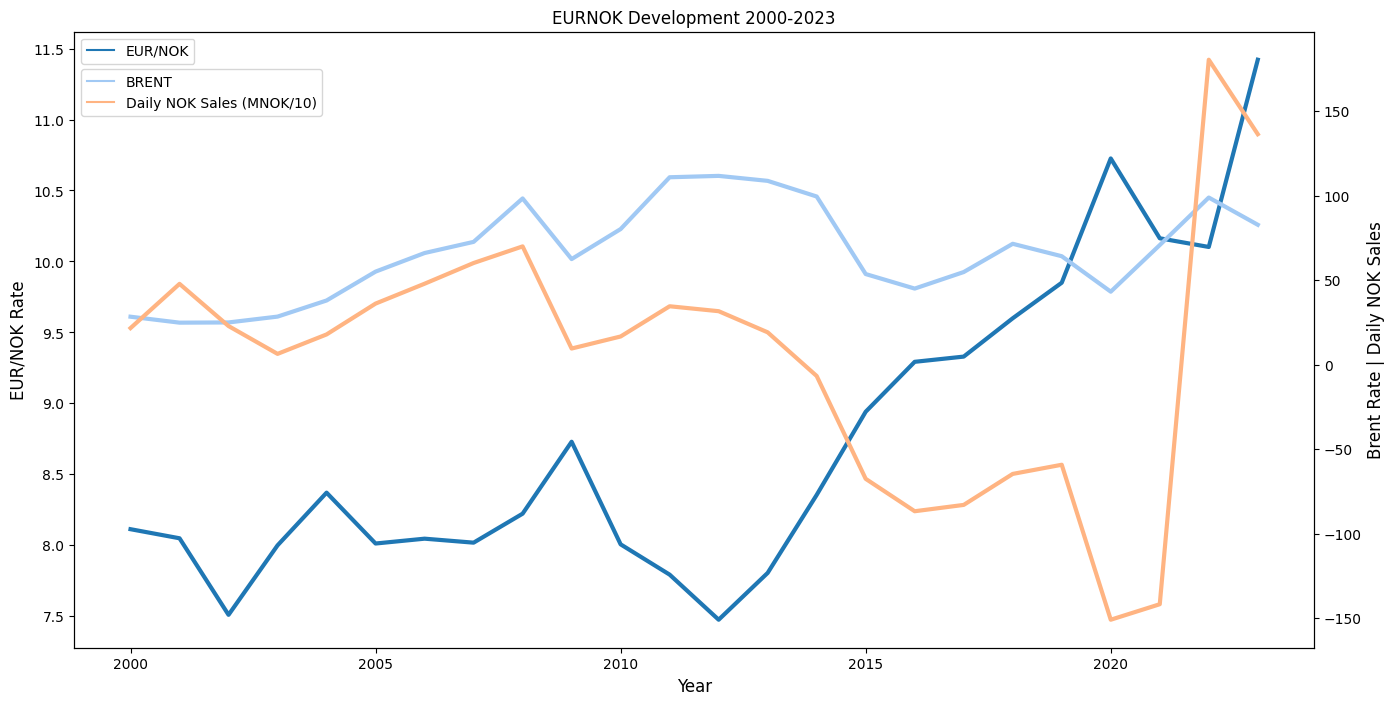

In [6]:
fig, ax1 = plt.subplots(figsize=(16,8))
ax1 = sns.lineplot(data=melted.query('variable == "EUR/NOK"'),hue='variable'
                   , palette=['tab:blue'], x='year', y='value', errorbar=None, ax=ax1, linewidth=3)
legend1 = ax1.legend(loc='upper left', bbox_to_anchor=(0,1))
ax1.set_xlabel('Year', size=12)
ax1.set_ylabel('EUR/NOK Rate', size=12)
ax1.set_title('EURNOK Development 2000-2023')

ax2 = ax1.twinx()
sns.lineplot(data=melted.query('variable == "BRENT" | variable == "Daily NOK Sales (MNOK/10)"'), x='year', y='value'
             , palette='pastel', hue='variable', errorbar=None, ax=ax2, linewidth=3)

ax2.legend(loc='upper left', bbox_to_anchor=(0,0.95))
ax2.set_ylabel('Brent Rate | Daily NOK Sales', size=12);

**Figure interpretation**: The NOK has gone up and down from year 2000 till about 2012. From that year it has depreciated steadily against EUR all the way until 2023 where it is close to a rate of 12. In that same period, the BRENT (oil price) has gone up and down from 20 to above a hundred throughout the period. NOK Sales (NOK Billion x 10) has also gone up and down in the time period. Negative values correspond to NOK "buys" by the Norwegian central bank, while positive values correspond to selling. 

Looking at these three timeseries at the same time does not give us any clear long term trend of why the NOK has depreciated steadily since 2012. Let's look at our other values and compare them to the EUR/NOK next. 

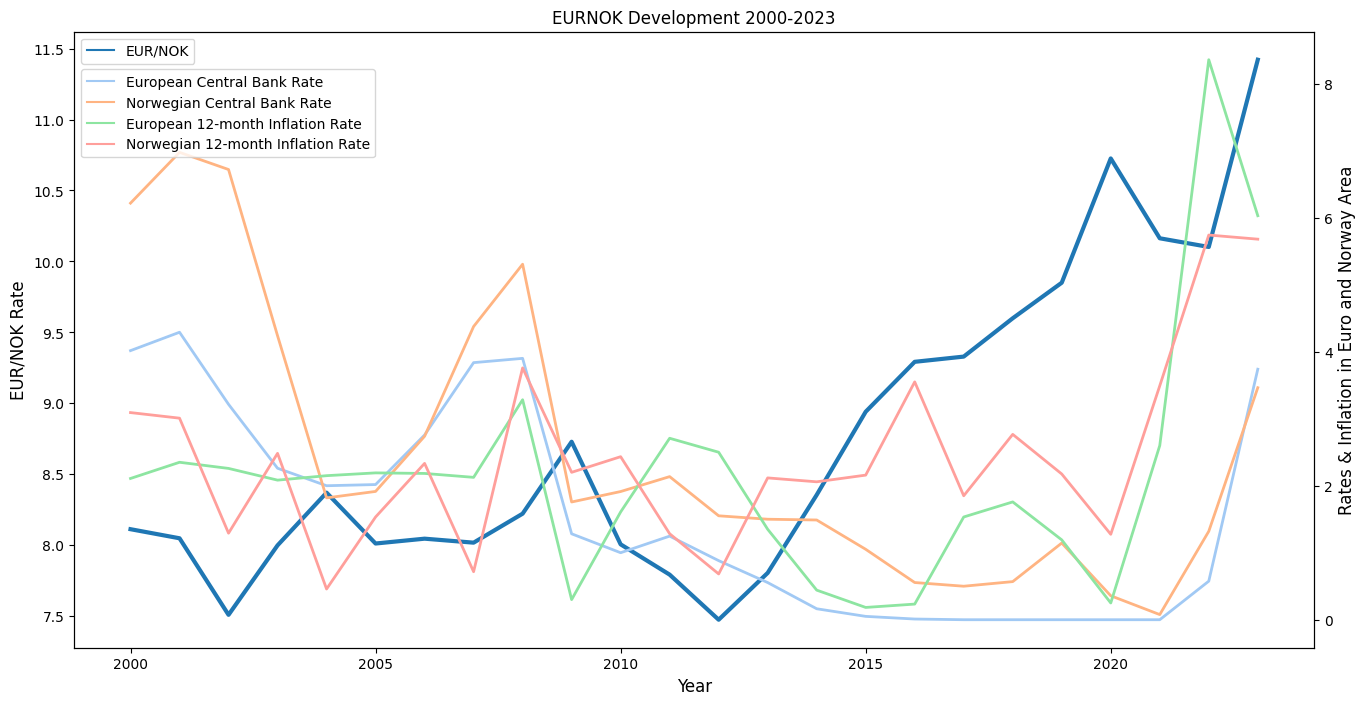

In [7]:
fig, ax1 = plt.subplots(figsize=(16,8))
ax1 = sns.lineplot(data=melted.query('variable == "EUR/NOK"'),hue='variable'
                   , palette=['tab:blue'], x='year', y='value', errorbar=None, ax=ax1, linewidth=3)
legend1 = ax1.legend(loc='upper left', bbox_to_anchor=(0,1))
ax1.set_xlabel('Year', size=12)
ax1.set_ylabel('EUR/NOK Rate', size=12)
ax1.set_title('EURNOK Development 2000-2023')

ax2 = ax1.twinx()
sns.lineplot(data=melted.query('variable != "EUR/NOK" & variable != "BRENT" & variable != "Daily NOK Sales (MNOK/10)"')
             , x='year', y='value', palette='pastel', hue='variable', errorbar=None, ax=ax2, linewidth=2)
ax2.legend(loc='upper left', bbox_to_anchor=(0,0.95))
ax2.set_ylabel('Rates & Inflation in Euro and Norway Area', size=12); 

**Figure interpretation**: In the figure above, The EUR/NOK rate is plotted against the norwegian and european central bank rates, as well as the norwegian and euro 12-month inflation rate. This time, we can see some co-variation between EUR/NOK and other KPIs. A higher central bank rate in Norway than in the EUR area should increase the demand for NOK (and appreciate it against the EUR). Looking at the graph, this is true some of the time, but not all the time. For example, aroundthe year 2015-2017 the difference between the NOK and the EUR central bank rate is quite substantial. Still, through this period the NOK is depreciating against the EUR. From our first figure we can see the oil price went down in the same period. A lower oil price can correspond to a weakening in the NOK, as Norway is exporting a lot of oil and gas. Hence, these two KPI-changes should give conflicting signals to the EUR/NOK rate, but there is no clear 1-sided trend as a result.

Finally, to conclude, there is no clear conclusion to be drawn by these two plots. Perhaps the reason for this is that not enough variation of the EUR/NOK rate can be captured by our gathered datasets. 

### **5.2:** Reflection
If I had more time to complete the project, I would like to look into additional datasets of interest to explore the EUR/NOK variation further. Going more granular down to daily data and look at how daily news affects the EUR/NOK rate could also be interesting, and expand upon the exploratory data analysis. In that case I would set up more automatic data gathering methods for all datasets, and store them in a database. Automatic refresh of datsets could be interesting aswell to create real-time dashboards.    